<h1><center>COMS7047A Term Project: Swahili News Classification</center></h1> 
<h2><center>Notebook 1 - Data Preparation and Exploration</center></h2> 

<img src="./wits_logo.png" alt="Wits_Logo" style="width: 400px;"/>

***
<h4><center> Samantha Ball  &nbsp;   1603701   &nbsp;  2021</center></h4>

## Introduction

This project will investigate three different approaches to the problem of Swahili news classification. Three contrasting algorithms will be explored, namely,

- Naive Bayes
- Support Vector Machines
- Transformers - BERT model

In order to implement news classification, the dataset first requires significant preprocessing and data exploration which will be performed in this notebook. The notebook structure is as follows:

- 1 - Data Preparation and Exploration
- 2 - Classical Approaches: Naive Bayes and SVM
- 3 - Deep Leaning Approaches: Exploring transformers

In [2]:
#----INSTALL LIBRARIES----#
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas.util.testing as tm
import seaborn as sns
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.model_selection import train_test_split 
%matplotlib inline

## Data Import

The chosen dataset consists of a compilation of Swahili news articles which are categorised according to six different news categories. Specifically the *uchumi*, *kitaifa*, *michezo*, *afya*, *kimataifa* and *burudani* categories are considered which represent finance news, local news, sports news, health news, international news and entertainment news respectively.

The dataset was obtained from [Zenodo](https://zenodo.org/record/4300294#.YMRNmDYza3I) [[1](#references)].

In [3]:
#----IMPORT DATA----#
data_path = "./train.csv" # data given in CSV format
df = pd.read_csv(data_path) #read in data

pd.set_option('display.max_columns', None) #show all columns
print("The first 10 rows of the dataframe") 
df.head(10)

The first 10 rows of the dataframe


,id,content,category
0,SW4670,"Bodi ya Utalii Tanzania (TTB) imesema, itafan...",uchumi
1,SW30826,"PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...",kitaifa
2,SW29725,Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...,uchumi
3,SW20901,"TIMU ya taifa ya Tanzania, Serengeti Boys jan...",michezo
4,SW12560,Na AGATHA CHARLES – DAR ES SALAAM ALIYEKUWA K...,kitaifa
5,SW30734,MAJADILIANO kati ya aliyekuwa Mkurugenzi wa z...,kitaifa
6,SW28096,Mwandishi\nWetu – butiama MKUU wa majeshi\nmst...,kitaifa
7,SW1223,['Huenda Manchester United ikasubiri ukaguzi w...,michezo
8,SW20534,SHIRIKA la Bima la Taifa (NIC) linakuja na Bi...,uchumi
9,SW9193,"RAIS wa Zanzibar, Dk Ali Mohamed Shein amewat...",kitaifa


## Data Preparation

We can see above that the input to our text classification algorithm is the *content* column, which contains news articles. The news articles contain

- mixed case
- abbreviations and
- special characters 

These require preprocessing to adapt them to the correct form for the text classification algorithms.


### Missing Values

We check for missing values in any of the columns.

In [45]:
#----IMPUTE MISSING VALUES----#

#Find number of missing data entries in each column
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

id
False    23268
Name: id, dtype: int64

content
False    23268
Name: content, dtype: int64

category
False    23268
Name: category, dtype: int64



No missing values found therefore no imputation needed.

### Text preprocessing

Data cleaning is vital to remove noise from the dataset, allowing the NLP models to focus on the text meaning. Several preprocessing steps will be perfomed including

a) Lowercasing 

b) Removing stopwords 

c) Removing punctuation 

d) Tokenizing 

Each technique will be demonstrated using a single sample and then a function will be written to combine all pre-processing steps into a unified method.

#### a) Lowercasing

In [46]:
#----TEST SAMPLE----#

sample = df["content"].values[10]

In [47]:
#----LOWERCASE----#

# Convert all letters to lowercase
sample = sample.lower()
print (sample)

stockholm, sweden serikali ya sweden
imemrudisha nyumbani balozi wake nchini china kuhusiana na kuhusika kwake
katika mkutano wenye utata uliohusisha binti wa muuza vitabu mwenye asili ya
mataifa hayo mawili, ambaye anashikiliwa na china. balozi anna
lindstedt, aliondoka beijing juzi, msemaji wa wizara ya mambo ya nje wa sweden
alisema. tukio lilianza
kwa angela gui, ambaye baba yake, gui minhai anaaminika kutekwa na makachero wa
china mwaka 2015, kuandika kwenye mtandao wa jamii kuhusu mkutano huo na
lindstedt. gui alikuwa mmoja
wa wauza vitabu watano wa hong kong waliokamatwa. vitabu wanavyouza vimekuwa
vikiikosoa vikali china. gui, ambaye
alisomea shahada ya uzamivu katika chuo kikuu cha cambridge  uingereza, amekuwa akiendesha kampeni mitandaoni
ya kutaka kuachiwa kwa baba yake. mwezi uliopita, lindstedt
alikaribishwa katika mkutano na kundi la wafanyabiashara wa china waliodai kuwa
na ukaribu na chama cha kikomunisti cha china. gui alisema watu
hao walimshinikiza akubali kuingia m

#### b) Remove punctuation

In [48]:
#----REMOVE PUNCTUATION----#

punctuation_list = ".!?`,)-(\"" # add quotations and brackets
for punc in punctuation_list:
    sample = sample.replace(punc, "")
print (sample)

stockholm sweden serikali ya sweden
imemrudisha nyumbani balozi wake nchini china kuhusiana na kuhusika kwake
katika mkutano wenye utata uliohusisha binti wa muuza vitabu mwenye asili ya
mataifa hayo mawili ambaye anashikiliwa na china balozi anna
lindstedt aliondoka beijing juzi msemaji wa wizara ya mambo ya nje wa sweden
alisema tukio lilianza
kwa angela gui ambaye baba yake gui minhai anaaminika kutekwa na makachero wa
china mwaka 2015 kuandika kwenye mtandao wa jamii kuhusu mkutano huo na
lindstedt gui alikuwa mmoja
wa wauza vitabu watano wa hong kong waliokamatwa vitabu wanavyouza vimekuwa
vikiikosoa vikali china gui ambaye
alisomea shahada ya uzamivu katika chuo kikuu cha cambridge  uingereza amekuwa akiendesha kampeni mitandaoni
ya kutaka kuachiwa kwa baba yake mwezi uliopita lindstedt
alikaribishwa katika mkutano na kundi la wafanyabiashara wa china waliodai kuwa
na ukaribu na chama cha kikomunisti cha china gui alisema watu
hao walimshinikiza akubali kuingia makubaliano  ambay

Whitespace characters such as newline characters, tabs and latin spaces are removed, as shown below.

In [49]:
#---REMOVE WHITESPACE CHARACTERS---#

sample = sample.replace(u'\xa0', u' ') # remove latin spaces
sample = sample.replace(u'\n', u' ') # remove newline characters 
sample = sample.replace(u'\t', u' ') # remove tab characters
print(sample)

stockholm sweden serikali ya sweden imemrudisha nyumbani balozi wake nchini china kuhusiana na kuhusika kwake katika mkutano wenye utata uliohusisha binti wa muuza vitabu mwenye asili ya mataifa hayo mawili ambaye anashikiliwa na china balozi anna lindstedt aliondoka beijing juzi msemaji wa wizara ya mambo ya nje wa sweden alisema tukio lilianza kwa angela gui ambaye baba yake gui minhai anaaminika kutekwa na makachero wa china mwaka 2015 kuandika kwenye mtandao wa jamii kuhusu mkutano huo na lindstedt gui alikuwa mmoja wa wauza vitabu watano wa hong kong waliokamatwa vitabu wanavyouza vimekuwa vikiikosoa vikali china gui ambaye alisomea shahada ya uzamivu katika chuo kikuu cha cambridge  uingereza amekuwa akiendesha kampeni mitandaoni ya kutaka kuachiwa kwa baba yake mwezi uliopita lindstedt alikaribishwa katika mkutano na kundi la wafanyabiashara wa china waliodai kuwa na ukaribu na chama cha kikomunisti cha china gui alisema watu hao walimshinikiza akubali kuingia makubaliano  ambay

#### c) Tokenize

Tokenizing refers to the splitting of the sample into individual words or 'tokens'.

In [50]:
#----TOKENIZE----#

sample = sample.split(" ")
print(sample)

['stockholm', 'sweden', 'serikali', 'ya', 'sweden', 'imemrudisha', 'nyumbani', 'balozi', 'wake', 'nchini', 'china', 'kuhusiana', 'na', 'kuhusika', 'kwake', 'katika', 'mkutano', 'wenye', 'utata', 'uliohusisha', 'binti', 'wa', 'muuza', 'vitabu', 'mwenye', 'asili', 'ya', 'mataifa', 'hayo', 'mawili', 'ambaye', 'anashikiliwa', 'na', 'china', 'balozi', 'anna', 'lindstedt', 'aliondoka', 'beijing', 'juzi', 'msemaji', 'wa', 'wizara', 'ya', 'mambo', 'ya', 'nje', 'wa', 'sweden', 'alisema', 'tukio', 'lilianza', 'kwa', 'angela', 'gui', 'ambaye', 'baba', 'yake', 'gui', 'minhai', 'anaaminika', 'kutekwa', 'na', 'makachero', 'wa', 'china', 'mwaka', '2015', 'kuandika', 'kwenye', 'mtandao', 'wa', 'jamii', 'kuhusu', 'mkutano', 'huo', 'na', 'lindstedt', 'gui', 'alikuwa', 'mmoja', 'wa', 'wauza', 'vitabu', 'watano', 'wa', 'hong', 'kong', 'waliokamatwa', 'vitabu', 'wanavyouza', 'vimekuwa', 'vikiikosoa', 'vikali', 'china', 'gui', 'ambaye', 'alisomea', 'shahada', 'ya', 'uzamivu', 'katika', 'chuo', 'kikuu', 'cha

#### d) Remove stopwords

Stopwords refer to joining or common words that do not add to the meaning of the sentence. Stopwords for the Swahili language were obtained through the integration of additional data from Mendeley data [[2](#references)].

In [51]:
#----REMOVE STOPWORDS----#

data_path = "./stopwords.csv" # additional data from Mendeley data
stopword_data = pd.read_csv(data_path) #read in data

stopword_list = stopword_data["StopWords"].values
print(stopword_list)

['na' 'lakini' 'ingawa' 'ingawaje' 'kwa' 'sababu' 'hadi' 'hata' 'kama'
 'ambapo' 'ambamo' 'ambako' 'ambacho' 'ambao' 'ambaye' 'ilhali' 'ya'
 'yake' 'yao' 'yangu' 'yetu' 'yenu' 'vya' 'vyao' 'vyake' 'vyangu' 'vyenu'
 'vyetu' 'yako' 'yao' 'hizo' 'yenu' 'mimi' 'sisi' 'wewe' 'nyinyi' 'yeye'
 'wao' 'nao' 'nasi' 'nanyi' 'ni' 'alikuwa' 'atakuwa' 'hii' 'hizi' 'zile'
 'ile' 'hivi' 'vile' 'za' 'zake' 'zao' 'zenu' 'kwenye' 'katika' 'kwa'
 'kwao' 'kwenu' 'kwetu' 'dhidi' 'kati' 'miongoni' 'katikati' 'wakati'
 'kabla' 'baada' 'baadaye' 'nje' 'tena' 'mbali' 'halafu' 'hapa' 'pale'
 'mara' 'mara' 'yoyote' 'wowote' 'chochote' 'vyovyote' 'yeyote' 'lolote'
 'mwenye' 'mwenyewe' 'lenyewe' 'lenye' 'wote' 'lote' 'vyote' 'nyote'
 'kila' 'zaidi' 'hapana' 'ndiyo' 'au' 'ama' 'ama' 'sio' 'siye' 'tu' 'budi'
 'nyingi' 'nyingine' 'wengine' 'mwingine' 'zingine' 'lingine' 'kingine'
 'chote' 'sasa' 'basi' 'bila' 'cha' 'chini' 'hapo' 'pale' 'huku' 'kule'
 'humu' 'hivyo' 'hivyohivyo' 'vivyo' 'palepale' 'fauka' 'hiyo' 'hiyo

In [52]:
# remove every occurrence of stopwords occurring in the sample 

sample = [word for word in sample if word not in stopword_list]
print(sample)

['stockholm', 'sweden', 'serikali', 'sweden', 'imemrudisha', 'nyumbani', 'balozi', 'nchini', 'china', 'kuhusiana', 'kuhusika', 'kwake', 'mkutano', 'wenye', 'utata', 'uliohusisha', 'binti', 'muuza', 'vitabu', 'asili', 'mataifa', 'hayo', 'mawili', 'anashikiliwa', 'china', 'balozi', 'anna', 'lindstedt', 'aliondoka', 'beijing', 'juzi', 'msemaji', 'wizara', 'mambo', 'sweden', 'alisema', 'tukio', 'lilianza', 'angela', 'gui', 'baba', 'gui', 'minhai', 'anaaminika', 'kutekwa', 'makachero', 'china', 'mwaka', '2015', 'kuandika', 'mtandao', 'jamii', 'kuhusu', 'mkutano', 'lindstedt', 'gui', 'mmoja', 'wauza', 'vitabu', 'watano', 'hong', 'kong', 'waliokamatwa', 'vitabu', 'wanavyouza', 'vimekuwa', 'vikiikosoa', 'vikali', 'china', 'gui', 'alisomea', 'shahada', 'uzamivu', 'chuo', 'kikuu', 'cambridge', '', 'uingereza', 'amekuwa', 'akiendesha', 'kampeni', 'mitandaoni', 'kutaka', 'kuachiwa', 'baba', 'mwezi', 'uliopita', 'lindstedt', 'alikaribishwa', 'mkutano', 'kundi', 'wafanyabiashara', 'china', 'waliodai

It can be observed that the cleaned sample is shorter than the original news article. The above steps are collated into a single method below.

In [54]:
#----DATA CLEANING ALGORITHM---#

# create one method to perform data cleaning steps
def process_sample(sample, stopword_list):
    
     # lowercase
    sample = sample.lower()
    
    # remove punctuation
    punctuation_list = ".!`?,)-(\"" 
    for punc in punctuation_list:
        sample = sample.replace(punc, "") 
    
    # remove newline and tab characters and latin spaces
    sample = sample.replace(u'\xa0', u' ')
    sample = sample.replace(u'\n', u' ')
    sample = sample.replace(u'\t', u' ')
    
    # tokenize   
    sample = sample.split(" ") 
    
    # remove stopwords
    sample = [word for word in sample if word not in stopword_list]
    return sample
    

We now apply the pre-processing steps to all samples.

In [56]:
#---PROCESS ALL SAMPLES---#

clean_samples = []
for i in range(len(df['content'].values)):
    sample = df['content'].values[i]
    clean = process_sample(sample, stopword_list)
    row = [clean, df['category'].values[i]]
    clean_samples.append(row)

print(clean_samples[0:5])


[[['', 'bodi', 'utalii', 'tanzania', 'ttb', 'imesema', 'itafanya', 'misafara', 'kutangaza', 'utalii', 'miji', 'minne', 'nchini', 'china', 'juni', '19', 'juni', '26', 'mwaka', 'huumisafara', 'itatembelea', 'miji', 'beijing', 'juni', '19', 'shanghai', 'juni', '21', 'nanjig', 'juni', '24', 'changsha', 'juni', '26mwenyekiti', 'bodi', 'ttb', 'jaji', 'mstaafu', 'thomas', 'mihayo', 'ameyasema', 'hayo', 'mkutano', 'waandishi', 'habari', 'jijini', 'dar', 'es', 'salaam“tunafanya', 'jitihada', 'kuhakikisha', 'tunavuna', 'watalii', 'wengi', 'china', 'tukizingatia', 'umuhimu', 'soko', 'sekta', 'utalii', 'nchini”', 'amesema', 'jaji', 'mihayonovemba', '2018', 'ttb', 'ilifanya', 'ziara', 'miji', 'beijing', 'shanghai', 'chengdu', 'guangzhou', 'hong', 'kong', 'kutangaza', 'vivutio', 'utalii', 'sanjari', 'kuzitangaza', 'safari', 'ndege', 'air', 'tanzaniaziara', 'inaelezwa', 'kuzaa', 'matunda', 'ikiwa', 'watalii', '300', 'kuja', 'nchini', 'mei', 'mwaka', 'kutembelea', 'vivutio', 'utalii'], 'uchumi'], [[''

#### Save clean data to CSV

The cleaned samples are saved to a csv file for further exploration.

In [57]:
#---SAVE CLEAN DATA TO CSV---#

df_clean = pd.DataFrame(clean_samples, columns = ["content", "category"]) 
    
# saving the dataframe 
df_clean.to_csv('clean_samples.csv') 

In [7]:
#---READ CLEAN DATA INTO DF---#

def converter(sample):
    res = sample.replace("'", "")
    res = res.strip('][').split(',')
    return res

data_path = "./clean_samples.csv" # data given in CSV format
df_clean = pd.read_csv(data_path, converters={"content":converter}) #read in data
#df_clean = pd.read_csv(data_path)

pd.set_option('display.max_columns', None) #show all columns
print("The first 10 rows of the dataframe") 
df_clean.head(10)

The first 10 rows of the dataframe


,Unnamed: 0,content,category
0,0,"[, bodi, utalii, tanzania, ttb, imesema, ...",uchumi
1,1,"[, pendo, fundishambeya, rais, dk, john, ...",kitaifa
2,2,"[mwandishi, wetu, singida, benki, nmb, im...",uchumi
3,3,"[, timu, taifa, tanzania, serengeti, boys...",michezo
4,4,"[, agatha, charles, –, dar, es, salaam, ...",kitaifa
5,5,"[, majadiliano, aliyekuwa, mkurugenzi, zam...",kitaifa
6,6,"[mwandishi, wetu, –, butiama, mkuu, majes...",kitaifa
7,7,"[""[huenda"", manchester, united, ikasubiri, ...",michezo
8,8,"[, shirika, bima, taifa, nic, linakuja, ...",uchumi
9,9,"[, rais, zanzibar, dk, ali, mohamed, she...",kitaifa


## Data Exploration

Now that we have transformed the textual data into a more amenable format, data exploration will be performed to further understand the structure and features of the data.

### Key Metrics

Several key metrics for textual data are explored, including,

 1. Number of samples
 2. Number of classes/categories
 3. Number of samples per class
 4. Median number of words per sample
 5. Distribution of number of words per sample
 6. Median sample length per class

#### No. of samples and classes

We see below that the dataset consists of 23268 examples which are categorised into 6 classes.

In [35]:
#----NO. OF SAMPLES AND CLASSES----#

# No. of samples
print("No. of Samples: {}". format(df.shape[0]))

# No. of classes
print("No. of Classes: {}". format(len(np.unique(df["category"]))))

No. of Samples: 23268
No. of Classes: 6


#### No. of samples per class

We plot the distribution of the target variable *category* to investigate the presence of class imbalance.

kitaifa      10242
michezo       6004
burudani      2229
uchumi        2028
kimataifa     1906
afya           859
Name: category, dtype: int64


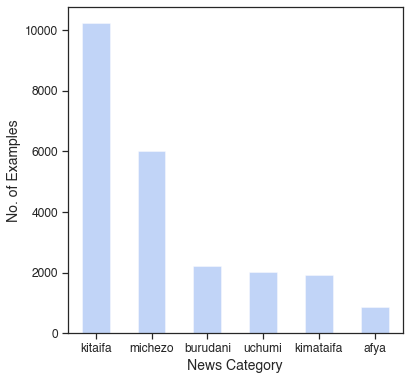

In [24]:
#----DISTRIBUTION OF TARGET VARIABLE----#

#Visualise target variable: news category
# No. of samples per class

fig, axs = plt.subplots(1,1,figsize=(6,6))
target_counts = df['category'].value_counts()
print(target_counts)
ax = target_counts.plot.bar(x='lab', y='val', rot=0, color='cornflowerblue', alpha=0.4) ##007acc
plt.ylabel("No. of Examples", fontsize=14)
plt.xlabel("News Category", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
#plt.title("Distribution of News Categories")
plt.rcParams["figure.figsize"] = (8,8)
plt.savefig('target.png', dpi = 300, bbox_inches='tight')
plt.show()

From the graph it can be observed that there is a severe class imbalance with an uneven distribution of samples across the news categories. Specifically, the *kitaifa* (local news) category has the highest number of samples with 10242 samples while the *afya* (health news) category has the lowest number of samples at 859.

This class imbalance will need to be addressed during the modelling process.

#### Median no. of words per sample

To investigate the characteristics of the news articles, the median sample length is found. 

Median No. of Words Per Sample: 274.0


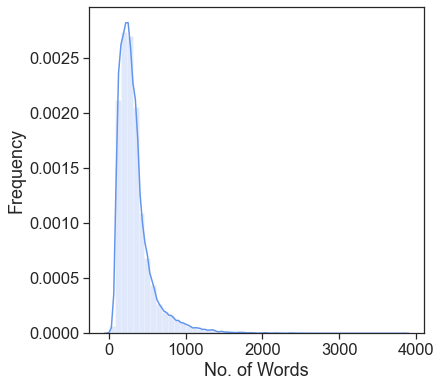

In [6]:
#---MEDIAN NUMBER OF WORDS PER SAMPLE BEFORE PREPROCESSING---#

lengths = [len(sample.split(" ") ) for sample in df["content"].values]
median_length = np.median(lengths)
print("Median No. of Words Per Sample: {}". format(median_length))
fig, axs = plt.subplots(1,1,figsize=(6,6))
sns.set(font_scale=1.5)
sns.set_style("ticks")
sns_plot = sns.distplot(lengths, color='cornflowerblue', hist_kws=dict(alpha=0.2))
sns_plot.set(xlabel = 'No. of Words', ylabel = "Frequency")
#plt.title("Median No. of Words Per Sample before Preprocessing")
plt.savefig('median_length_before.png', dpi = 200, bbox_inches='tight')
plt.show()

It can be noted that pre-processing steps such as stopword removal shorten the length of the news articles, therefore we calculate the median sample length following preprocessing.

Median No. of Words Per Sample: 188.0


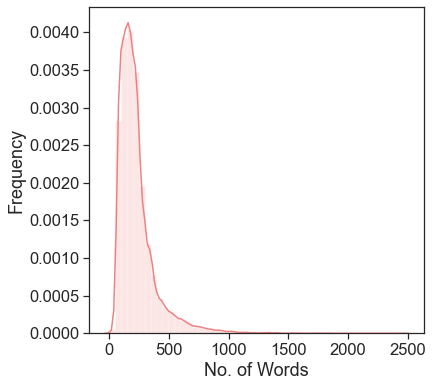

In [12]:
#---MEDIAN NUMBER OF WORDS PER SAMPLE AFTER PREPROCESSING---#

lengths = [len(sample) for sample in df_clean["content"].values]
median_length = np.median(lengths)
print("Median No. of Words Per Sample: {}". format(median_length))
fig, axs = plt.subplots(1,1,figsize=(6,6))
sns.set(font_scale=1.5)
sns.set_style("ticks")
sns_plot = sns.distplot(lengths, color='lightcoral', hist_kws=dict(alpha=0.2))
sns_plot.set(xlabel = 'No. of Words', ylabel = "Frequency")
#plt.title("Median No. of Words Per Sample after Preprocessing")
plt.savefig('median_length_after.png', dpi = 200, bbox_inches='tight')
plt.show()

The median sample length decreses fairly significantly from 274 to 188. The comparison in sample length distributions before and after preprocessing is shown below.

Median No. of Words Per Sample Before Pre-processing: 274.0
Median No. of Words Per Sample After Pre-processing: 188.0


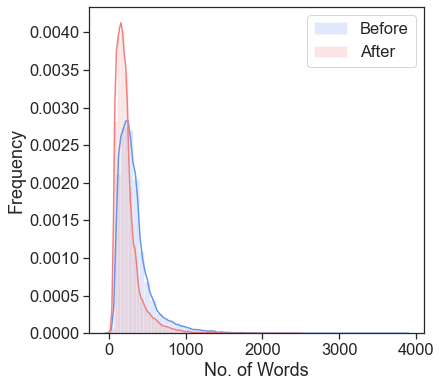

In [15]:
#---MEDIAN NUMBER OF WORDS PER SAMPLE BEFORE AND AFTER PREPROCESSING---#

before_lengths = [len(sample.split(" ")) for sample in df["content"].values]
median_length_before = np.median(before_lengths)
print("Median No. of Words Per Sample Before Pre-processing: {}". format(median_length_before))
after_lengths = [len(sample) for sample in df_clean["content"].values]
median_length_after = np.median(after_lengths)
print("Median No. of Words Per Sample After Pre-processing: {}". format(median_length_after))
fig, axs = plt.subplots(1,1,figsize=(6,6))
sns.set_style("ticks")
sns_plot = sns.distplot(before_lengths, color='cornflowerblue', hist_kws=dict(alpha=0.2), label='Before')
sns_plot = sns.distplot(after_lengths, color='lightcoral', hist_kws=dict(alpha=0.2), label='After')
sns_plot.set(xlabel = 'No. of Words', ylabel = "Frequency")
#plt.title("Median No. of Words Per Sample before and after Preprocessing")
plt.legend()
plt.show()

It can be observed that the median number of words per sample has decreased following pre-processing as stopwords which add no additional meaning have been removed. The sample length distribution also exhibits smaller variance following preprocessing.

#### Median sample length per class

The lengths of each news article are further explored by finding the median sample length per news category.

In [16]:
#---GROUP INTO NEWS CATEGORY---#

groups_before = df.groupby(df["category"])
print(len(groups_before))

6


In [17]:
#----CALCULATE MEDIAN SAMPLE LENGTH PER CLASS BEFORE PRE-PROCESSING---#

medians_before = {}
for g in groups_before:
    print(g)
    lengths = [len(sample.split(" ")) for sample in g[1]["content"].values]
    median_length = np.median(lengths)
    print(median_length)
    medians_before[g[0]] = median_length

('afya',             id                                            content category
35     SW19363  AVELINE KITOMARY – DAR ES SALAAM  Daktari\nBin...     afya
69      SW9681  Na FLORENCE SANAWA-MTWARA  ULAJI wa panya umek...     afya
101    SW18607  Na CHRISTIAN BWAYA WAZAZI bila kujali hali zen...     afya
137    SW22023   Mahitaji   Jinsi ya kuandaa\nKatakata vipande...     afya
164    SW14345  Gurian Adolf, Sumbawanga MKUU wa Wilaya ya Nka...     afya
...        ...                                                ...      ...
23155  SW11688   NA VERONICA ROMWALD WATOTO 24 waliozaliwa na ...     afya
23216   SW8885   MWANDISHI WETU WAZIRI wa Afya, Maendeleo ya J...     afya
23253   SW6746  Ramadhan Hassan  -Dodoma  SERIKALI imesema bad...     afya
23260  SW12537  Na Said Ameir, MAELEZO  KUWAPATIA wananchi daw...     afya
23261   SW5272   MWILI wa binadamu na viumbe wengine kama vile...     afya

[859 rows x 3 columns])
328.0
('burudani',             id                                 

dict_keys(['afya', 'burudani', 'kimataifa', 'kitaifa', 'michezo', 'uchumi'])


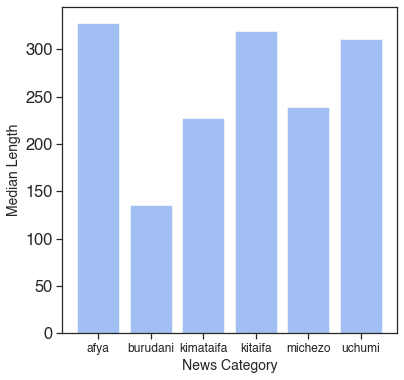

In [18]:
#--PLOT MEDIAN SAMPLE LENGTH PER CLASS--#

print(medians_before.keys())
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.bar(medians_before.keys(), medians_before.values(), color='cornflowerblue', alpha=0.6)
plt.ylabel("Median Length", fontsize=14)
plt.xlabel("News Category", fontsize=14)
plt.xticks(fontsize=12)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams["figure.figsize"] = (8,8)
plt.savefig('sample_length_per_class.png', dpi = 300)
plt.show()

It can be observed that the *burudani* class (entertainment news) has a much smaller median length than the other news classes.

In [19]:
#---GROUP CLEAN DATA INTO NEWS CATEGORY---#

groups_after = df_clean.groupby(df_clean["category"])
print(len(groups_after))

6


In [20]:
#----CALCULATE MEDIAN SAMPLE LENGTH PER CLASS AFTER PRE-PROCESSING---#

medians_after = {}
for g in groups_after:
    print(g)
    lengths = [len(sample) for sample in g[1]["content"].values]
    median_length = np.median(lengths)
    print(median_length)
    medians_after[g[0]] = median_length

('afya',        Unnamed: 0                                            content category
35             35  [aveline,  kitomary,  –,  dar,  es,  salaam,  ...     afya
69             69  [florence,  sanawamtwara,  ,  ulaji,  panya,  ...     afya
101           101  [christian,  bwaya,  wazazi,  kujali,  hali,  ...     afya
137           137  [,  mahitaji,  ,  ,  kuandaa,  katakata,  vipa...     afya
164           164  [gurian,  adolf,  sumbawanga,  mkuu,  wilaya, ...     afya
...           ...                                                ...      ...
23155       23155  [,  veronica,  romwald,  watoto,  24,  walioza...     afya
23216       23216  [,  mwandishi,  wetu,  waziri,  afya,  maendel...     afya
23253       23253  [ramadhan,  hassan,  ,  dodoma,  ,  serikali, ...     afya
23260       23260  [said,  ameir,  maelezo,  ,  kuwapatia,  wanan...     afya
23261       23261  [,  mwili,  binadamu,  viumbe,  wanyama,  una,...     afya

[859 rows x 3 columns])
233.0
('burudani',        Unna

dict_keys(['afya', 'burudani', 'kimataifa', 'kitaifa', 'michezo', 'uchumi'])


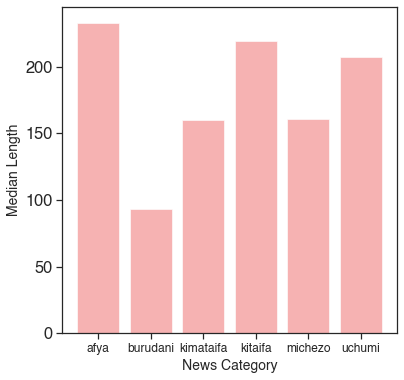

In [21]:
#--PLOT MEDIAN SAMPLE LENGTH PER CLASS--#

print(medians_after.keys())
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.bar(medians_after.keys(), medians_after.values(), color='lightcoral', alpha=0.6)
plt.ylabel("Median Length", fontsize=14)
plt.xlabel("News Category", fontsize=14)
#ax.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(fontsize=12)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
#plt.title("Distribution of News Categories")
plt.rcParams["figure.figsize"] = (8,8)
plt.savefig('sample_length_per_class_clean.png', dpi = 300)
plt.show()

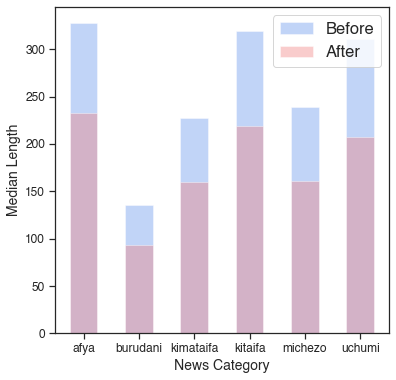

In [22]:
#---PLOT COMPARISON BEFORE AND AFTER DATA CLEANING---#

fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.bar(medians_before.keys(), medians_before.values(), color='cornflowerblue', alpha=0.4, label='Before', width=0.5)
ax.bar(medians_after.keys(), medians_after.values(), color='lightcoral', alpha=0.4, label='After', width=0.5)
plt.ylabel("Median Length", fontsize=14)
plt.xlabel("News Category", fontsize=14)
#ax.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
#plt.title("Distribution of News Categories")
plt.rcParams["figure.figsize"] = (8,8)
plt.legend()
plt.savefig('sample_length_per_class_clean.png', dpi = 300, bbox_inches='tight')
plt.show()

It can be noted that although all categories experience a reduction in median length after pre-processing, this does not change the relative lengths between the categories. Therefore articles in the entertainment news *burudani* category remain significantly shorter than articles in other news categories.

Now that the data structure and characteristics have been explored, the following notebook will explore the use of classical techniques such as Naive Bayes and Support Vector Machines to classify the Swahili news articles.

## References

<a id='references'></a>

[1] Davis David. Swahili: News classification dataset, Zenodo, 2020. http://doi.org/10.5281/zenodo.4300294

[2] Noel Masasi, Bernard Masua. Common Swahili Stop-words, Mendeley Data, 2020. http://doi.org/10.17632/mmf4hnsm2n.1